# KDE
Kernel Density Estimation

- sample particles
- calculate the average distance
- estimate the density


In [179]:
import random
import math
import matplotlib.pyplot as plt
import statistics
import numpy as np

# Generate samples

In [180]:
rng = [0, 100]
dlt = 0.05
n_samples = 50
def genSamples(center):
    samples = []
    for i in range(n_samples):
        #samples.append(random.uniform(rng[0] + (rng[1]-rng[0])*0.1, rng[1] - (rng[1]-rng[0])*0.1))
        if i % 5 == 0:
            samples.append(rng[0] + (rng[1]-rng[0])*center)
        else:
            samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.gauss((rng[0]+rng[1])/2.0, (rng[1]-rng[0])/2.0 * 0.1))
    return samples
samples = genSamples(0.4)
print("max: " + str(max(samples)))
print("min: " + str(min(samples)))

max: 98.65237904843114
min: 0.10162831850338838


(array([ 1.,  0.,  3.,  2.,  2.,  1.,  3.,  1., 10.,  3.,  3.,  8.,  4.,
         1.,  4.,  1.,  0.,  2.,  0.,  1.]),
 array([ 0.10162832,  5.02916585,  9.95670339, 14.88424093, 19.81177846,
        24.739316  , 29.66685354, 34.59439107, 39.52192861, 44.44946615,
        49.37700368, 54.30454122, 59.23207876, 64.15961629, 69.08715383,
        74.01469137, 78.9422289 , 83.86976644, 88.79730398, 93.72484151,
        98.65237905]),
 <a list of 20 Patch objects>)

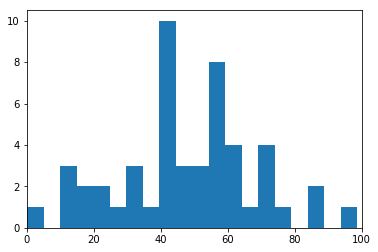

In [181]:
plt.xlim(rng[0], rng[1])
plt.hist(samples, bins=20)

# functions for KDE

In [182]:
sigma_def = 0.5
k = lambda x1, x2, sigma: math.exp(-(x1 - x2)**2/sigma/sigma/2)/sigma
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = [rng[0] + i * dlt for i in range(N)]

def estPDF(samples, sigma = sigma_def):
    x = rng[0]
    p = [0] * N
    for i in range(N):
        x = rng[0] + i * dlt
        for s in samples:
            p[i] += k(x, s, sigma)
    sum_p = sum(p) * dlt
    for i in range(len(p)):
        p[i] /= sum_p
    return p
def showPDF(p, title, ylim=None):
    plt.scatter(x_axis, p)
    plt.ylabel(title)
    if ylim != None:
        plt.ylim(0, ylim)
    plt.show()
    print('sum: ' + str(sum(p)*dlt))

# sigma based on average distance

In [183]:
dist = 0
d_list = []
cnt = 0
for i in range(n_samples):
    for j in range(i, n_samples):
        if i != j:
            d_list.append(math.fabs(samples[i] - samples[j]))
            dist += d_list[-1]
            cnt += 1
dist /= cnt
print('average dist: ' + str(dist))
d_list.sort()
print('median: ' + str(d_list[len(d_list)//2]))
sigma_opt = dist

average dist: 23.88826006609724
median: 20.30225204266133


# Estimation by constant sigma

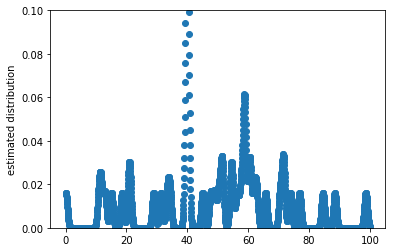

sum: 1.0000000000000002


In [184]:
p = estPDF(samples)
showPDF(p, 'estimated distribution', 0.1)

# Estimation by adjusted sigma

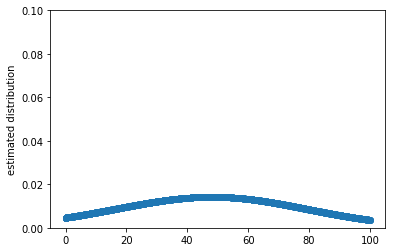

sum: 1.0000000000000002


In [185]:
p = estPDF(samples, sigma_opt)
showPDF(p, 'estimated distribution', 0.1)

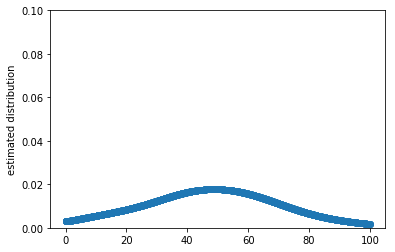

sum: 1.0000000000000024


In [186]:
p = estPDF(samples, sigma_opt/2)
showPDF(p, 'estimated distribution', 0.1)

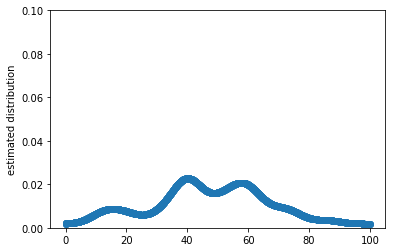

sum: 1.0000000000000027


In [187]:
p = estPDF(samples, sigma_opt/5)
showPDF(p, 'estimated distribution', 0.1)

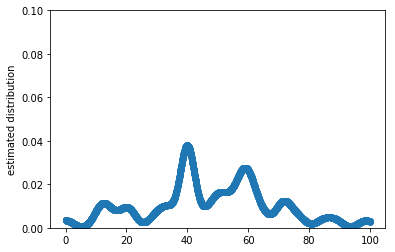

sum: 1.0


In [188]:
p = estPDF(samples, sigma_opt/10)
showPDF(p, 'estimated distribution', 0.1)

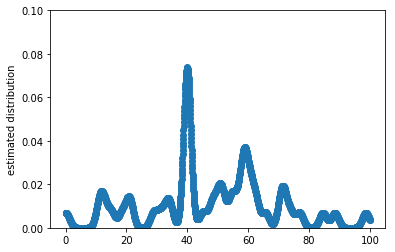

sum: 0.9999999999999964


In [189]:
p = estPDF(samples, sigma_opt/20)
showPDF(p, 'estimated distribution', 0.1)

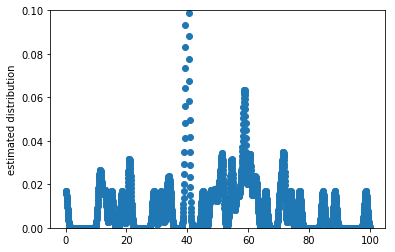

sum: 0.9999999999999999


In [190]:
p = estPDF(samples, sigma_opt/50)
showPDF(p, 'estimated distribution', 0.1)

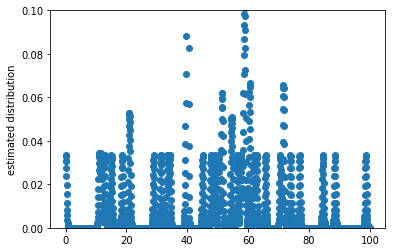

sum: 1.0000000000000044


In [191]:
p = estPDF(samples, sigma_opt/100)
showPDF(p, 'estimated distribution', 0.1)